## Difference between Desired and Actual Hours (All employed Australian Males with an Hours mismatch)

Desired - _jbtprhr , Actual - _jbhruc (All jobs, there is another variable for just the main job)
_hgsex for male/female

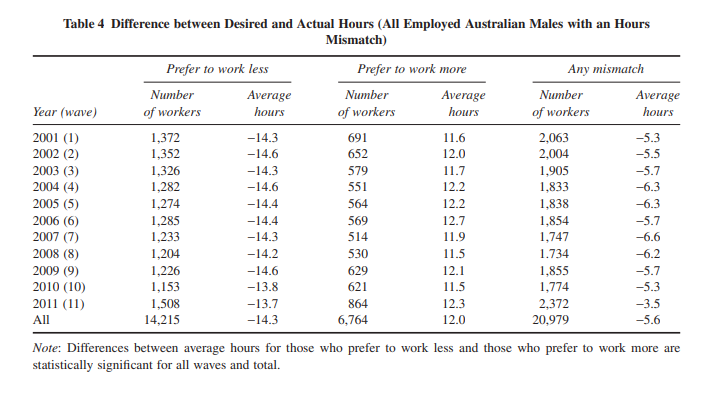

In [2]:
import pandas as pd
import numpy as np
from glob import glob
import numbers

In [3]:
filenames = glob('Combined_*[a,b,c,d,e,f,g,h,i,j,k]*160c.dta')
list_dfs  = [pd.read_stata(f) for f in filenames]

In [190]:
list_desired_index = [list_dfs[i].filter(regex='jbtprhr$').columns for i in range(11)]
list_desired = [list_dfs[i][list_desired_index[i]] for i in range(11)]

list_actual_index = [list_dfs[i].filter(regex='jbhruc$').columns for i in range(11)]
list_actual = [list_dfs[i][list_actual_index[i]] for i in range(11)]

list_sex_index = [list_dfs[i].filter(regex='hgsex$').columns for i in range(11)] #Finds the index for sex in each dataset
list_sex = [list_dfs[i][list_sex_index[i]] for i in range(11)] #waves_sex[0-10] are now created (waves1-11)

list_employed_index = [list_dfs[i].filter(regex='esbrd$').columns for i in range(11)]
list_employed = [list_dfs[i][list_employed_index[i]] for i in range(11)]

list_jbhr_index = [list_dfs[i].filter(regex='jbhrcpr$').columns for i in range(11)] #This finds the index for the string 'jbhrcpr' in all waves
list_jbhr = [list_dfs[i][list_jbhr_index[i]] for i in range(11)] #waves_jbhr[0-10] are now created (waves1-11)
              
lists_join = [list_sex[i].join([list_desired[i],list_actual[i], list_employed[i], list_jbhr[i]]) for i in range(11)]

In [228]:
Employed = [lists_join[i].iloc[:,3] == '[1] Employed' for i in range(11)]
waves_excluded = [lists_join[i][(Employed[i])] for i in range(11)]
waves_excluded = [waves_excluded[i][waves_excluded[i].iloc[:,0] == '[1] Male'] for i in range(11)]

male = [waves_excluded[i].iloc[:,0].name for i in range(11)]
employed = [waves_excluded[i].iloc[:,3].name for i in range(11)]
male_employed = [waves_excluded[i].drop(columns = [male[i], employed[i]]) for i in range(11)]

In [229]:
male_employed[0].columns = ['Desired', 'Actual', 'Preference']
# male_employed[i] = desired.. for i in range(11)
male_employed_pref = [male_employed[i][(male_employed[i].iloc[:,2] == '[3] More hours') | (male_employed[i].iloc[:,2] == '[1] Fewer hours')] for i in range(11)]

In [250]:
col1_to_numeric = [pd.to_numeric(male_employed_pref[i].iloc[:,0], errors='coerce') for i in range(11)]
col2_to_numeric = [pd.to_numeric(male_employed_pref[i].iloc[:,1], errors='coerce') for i in range(11)]
big_table = [pd.concat([male_employed_pref[i], col1_to_numeric[i]], axis=1) for i in range(11)]
big_table = [pd.concat([big_table[i], col2_to_numeric[i]], axis=1) for i in range(11)]

In [265]:
desired = [big_table[i].iloc[:,-2] for i in range(11)]
actual = [big_table[i].iloc[:,-1] for i in range(11)]

In [290]:
fewer_hours = [big_table[i][big_table[i].iloc[:,2] == '[1] Fewer hours'] for i in range(11)]
more_hours = [big_table[i][big_table[i].iloc[:,2] == '[3] More hours'] for i in range(11)]

In [349]:
desired = [fewer_hours[i].iloc[:,-2].sum()/(len(fewer_hours[i])) for i in range(11)]
actual = [fewer_hours[i].iloc[:,-1].sum()/(len(fewer_hours[i])) for i in range(11)]
wk_less_hrs = [desired[i] - actual[i] for i in range(11)]
tot_fewer_hrs = [len(fewer_hours[i]) for i in range(11)]

In [350]:
desired = [more_hours[i].iloc[:,-2].sum()/(len(more_hours[i])) for i in range(11)]
actual = [more_hours[i].iloc[:,-1].sum()/(len(more_hours[i])) for i in range(11)]
wk_more_hrs = [desired[i] - actual[i] for i in range(11)]
tot_more_hrs = [len(more_hours[i]) for i in range(11)]

In [351]:
desired = [big_table[i].iloc[:,-2].sum()/(len(big_table[i])) for i in range(11)]
actual = [big_table[i].iloc[:,-1].sum()/(len(big_table[i])) for i in range(11)]
wk_total= [desired[i] - actual[i] for i in range(11)]
tot_hrs = [len(big_table[i]) for i in range(11)]

In [352]:
work_less = pd.DataFrame(wk_less_hrs, tot_fewer_hrs).reset_index()
work_more = pd.DataFrame(wk_more_hrs, tot_more_hrs).reset_index()
work_total = pd.DataFrame(wk_total, tot_hrs).reset_index()

In [353]:
work_less.columns = (['Number of workers | prefer to work less', ' Average hours | prefer to work less'] )
work_more.columns = (['Number of workers | prefer to work more', ' Average hours | prefer to work more'] )
work_total.columns = (['Number of workers | Any mismatch', ' Average hours | Any mistmatch'] )

In [354]:
work_less.join(work_more).join(work_total)

,Number of workers | prefer to work less,Average hours | prefer to work less,Number of workers | prefer to work more,Average hours | prefer to work more,Number of workers | Any mismatch,Average hours | Any mistmatch
0,1372,-14.727405,693,11.748918,2065,-5.842131
1,1353,-14.697709,652,11.780675,2005,-6.087282
2,1330,-14.359398,583,12.542024,1913,-6.161004
3,1283,-14.558846,552,11.963768,1835,-6.580381
4,1275,-14.440000,566,11.632509,1841,-6.424226
5,1287,-14.617716,571,12.190893,1858,-6.378902
6,1235,-14.380567,515,11.887379,1750,-6.650286
7,1205,-14.560166,531,11.290019,1736,-6.653226
8,1231,-14.582453,632,12.430380,1863,-5.418680
9,1155,-13.991342,624,11.591346,1779,-5.017988


In [83]:
wave1 = {"Prefer to work less":{"Number of workers" : len(fewer_hours), "Average hours": wk_less_hrs} ,
         "Prefer to work more":{"Number of workers" : len(more_hours), "Average hours": wk_more_hrs},
         "Any mismatch": {"Number of workers" : len(male_employed_pref[0]), "Average hours": wk_total}
}

In [102]:
pd.DataFrame(wave1)

,Prefer to work less,Prefer to work more,Any mismatch
Number of workers,1372.000000,693.000000,2065.000000
Average hours,-14.727405,11.748918,-5.842131
